# Tarea 2: Clasificación

Felipe Bravo, Hernán Sarmiento, Aymé Arango, Alison Fernandez, Cinthia Mabel Sánchez, Juan Pablo Silva

**Octubre 2020**

## ============= Declaración de compromiso ético =============

Nosotros ****Nicolás Herrera, Sebastián Urbina y Samuel Sánchez,**** , declaramos que realizamos de manera grupal los pasos de la presente actividad. También declaramos no incurrir en copia, ni compartir nuestras respuestas con otras personas ni con otros grupos. Por lo que, ratificamos que las respuestas son de nuestra propia confección y reflejan nuestro propio conocimiento.


# Instrucciones


1. Trabajen en equipos de dos o tres personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2. Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda. 

3. Cuando finalice el laboratorio, **genere un archivo HTML** usando jupyter (ver tutorial 2) y súbalo a U-Cursos. El laboratorio debe ser entregado sólo por 1 integrante. Si se entrega por más de un integrante, se revisará cualquiera de éstos.

# Estructura de la tarea

Esta tarea está conformada por preguntas prácticas (donde se requiere completar código) intercaladas con preguntas de interpretación de resultados y descripción de conceptos teóricos vistos en clases. Las preguntas se dividen en 5 partes: 

1. Explorar los datos.
2. Entrenar un clasificador de 3 maneras: 
    1) Entrenando/Testeando con los mismos datos,
    2) Dividiendo el dataset en una parte para entrenar y otra para testear, y
    3) Usando cross-validation. Veremos accuracy, precision y recall para luego analizar los resultados. 
3. Comparar clasificadores con ciertos *baselines* o clasificadores base.
4. Seleccionar hiperparámetros.
5. Trabajar con clases desbalanceadas.

# Parte 1: Explorar los datos

Usaremos el **Wine Dataset**, que viene en **scikit-learn**. Ejecutaremos la siguiente línea de código para importar la librería que nos permitirá cargarlo.

In [2]:
from sklearn.datasets import load_wine

## Pregunta 1.1

Cargue los datos e indique lo siguiente:
* Tamaño del dataset (cantidad de instancias y atributos). 
* ¿Cuántas clases hay y cuáles son sus nombres?
* ¿Cuántas instancias hay en cada clase?

Indique en cada caso cómo obtuvo la respuesta, es decir, adjunte código.

In [3]:
import pandas as pd

In [4]:
df = load_wine(as_frame = True)
print("Cantidad de instancias:", df.data.shape[0])
print("Cantidad de atributos:", df.data.shape[1])
print("Características: ",df.feature_names)
print("Clases: ",df.target_names)

Cantidad de instancias: 178
Cantidad de atributos: 13
Características:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Clases:  ['class_0' 'class_1' 'class_2']


In [5]:
print("Instancias de la clase 0: ",len(df.frame[df.frame["target"]==0]))
print("Instancias de la clase 1: ",len(df.frame[df.frame["target"]==1]))
print("Instancias de la clase 2: ",len(df.frame[df.frame["target"]==2]))

Instancias de la clase 0:  59
Instancias de la clase 1:  71
Instancias de la clase 2:  48


### Respuesta:
Como se puede ver en el código anterior, el dataset contiene 178 instancias, 13 atributos/características y 3 clases, cuyos nombre son, clase 0, 1 y 2 respectivamente. Asimismo presenta 59 instancias de la clase 0, 71 de la clase 1 y 48 de la clase 2.

## Pregunta 1.2(incompleta)

Explique:
- ¿Qué hacen las siguientes líneas de código?

Lo primero que hace el código es importar el dataset wine de ``sklearn``y transformarlo a un dataframe de ``pandas`` para poder trabajarlo facilmente.

- ¿Qué nos muestra este gráfico? 

El gráfico muestra la distribución de las variables númericas en el dataset. En efecto, realiza ``scatterplots`` de a pares y respecto a su misma variable muestra un histograma.

- ¿Cuáles son las principales observaciones que puede obtener sobre los datos a partir de los gráficos?

Se puede notar que alcohol, ash, alcalinity_of_ash, y hue tienden a distribuirse de forma normal, mientras que para el caso de la variable color_intesity los datos se encuentra más concentrados a la izquierda, es decir, que la mayor parte de los datos tiene una intensidad del color más baja. Además, se pueden observar las correlaciones entre las distintas variable del dataset, por ejemplo, en el caso de la correlación entre alcohol y color_intensity se puede observar que en general a medida que aumenta la intensidad del color el nivel de alcohol también aumenta, por otro lado, en el caso de las variables color_intensity y hue, se tiene que mientras menor sea la variable color_intesity mayor será la variable hue. También existen casos en donde no se puede observar una correlación claramente, como en los casos de las variables ash y hue o alcohol y hue, ppuesto que los puntos de los gráficos se encuentran más dispersos y no muestran una tendencia clara.

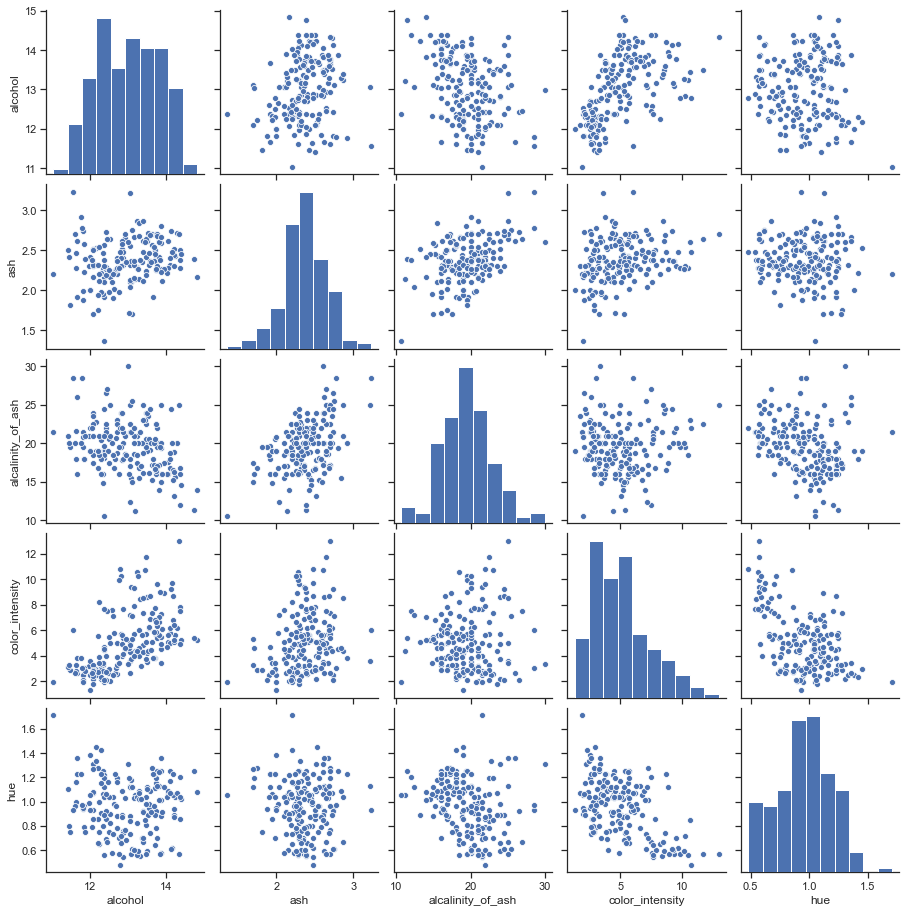

In [6]:
## EJECUTAR ESTE BLOQUE

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd

wine = load_wine()
data = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])

data['target'] = wine['target']
data['class'] = data['target'].map(lambda ind: wine['target_names'][ind])

g = sns.pairplot(data.iloc[:, [0,2,3,9,10]]) # Parametro kind="reg" agrega una recta
plt.show()

# Parte 2: Entrenar/testear clasificadores

En esta parte useremos el clasificador **Decision Tree**. Veremos distintas formas de usarlo, y vamos a compararlas utilizando diversas métricas. 

## Pregunta 2.1

Usando el siguiente código, complete lo que falta para cargar los datos, entrenar y hacer una predicción empleando el clasificador. Luego, muestre las métricas de **accuracy**, **precision**, **recall** y **f1-score**.

In [7]:
## RESPUESTA PREGUNTA 2.1

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier()

X = wine.data      ## datos, caracteristicas o features 
y = wine.target    ## clase para cada instancia anterior

# .... COMPLETE ACA
clf.fit(X, y) #Entrenamos el modelo con los datos

y_pred = clf.predict(X) #Hacemos una predicción con los datos de testeo
print(classification_report(y, y_pred)) #mostramos las metrica

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



## Pregunta 2.2

Explique cada una de las líneas de código de la pregunta 2.1 (omita las líneas que cargan librerías).

La primera línea, al objeto clf se le asigna la función DecisionTreeClasifier por temas de simplicidad en la escritura. Luego al objeto "X" se le asignan las variables de características de los vinos y el objeto "y" son las distintas clases de vinos, las cuales en este caso son 3. Luego con la función "clf.fit" se busca entrenar al modelo de árbol de decisión a partir de la data de "wine", para luego realizar una predición con los datos, utilizando la función "clf.predict" y luego se muestran métricas de rendimiento del modelo, las cuales son accuracy, precision, recall y f1-score.

## Pregunta 2.3

De acuerdo a las métricas obtenidas: 

1. ¿Qué opina sobre las predicciones? 

Las predicciones son perfectas, aunque no es de extrañar, ya que se utilizaron los mismos datos con los que se entrenó el modelo para realizar las predicciones.

2. ¿Recomendaría utilizar este clasificador en una aplicacion para clasificar vinos? ¿Por qué?

No, ya que no tenemos cómo saber si el modelo es generalizable, ya que no tenemos datos nuevos(diferentes a los que se utilizó para entrenar el modelo) previamente etiquetados para realizar predicciones y poder analizar las metricas obtenidas.

3. ¿Qué problema puede identificar?

Podemos notar que caímos en un problema de overfitting, ya que por un lado se entrenó el modelo con el 100% de los datos y luego se utilizaron los mismos para testearlo, por lo que obtuvimos 100% de accuracy. Al realizar esto no tenemos como saber si el modelo funcionará correctamente con datos nuevos.

## CLASIFICADOR 2

Ahora lo que haremos será dividir nuestro dataset en 70% entrenar (***training set***) y 30% para testear (***testing set***). Use la función ***train_test_split()*** de *sklearn* y utilice las variables `X_train, X_test, y_train, y_test`.

## Pregunta 2.4

Escriba el código necesario para dividir los datos, entrenar el modelo e indicar el **accuracy**, **precision** y **recall** del clasificador. 
Entrene usando el ***training set*** y pruebe sobre el ***testing set***, en base a la división 70%-30%, respectivamente 

**NOTA: para dividir el dataset use el parámetro `stratify=y`.**

In [47]:
### Respuesta a pregunta 2.4
# ...
# Recuerde usar las variables X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30, stratify = y) #Dividimos el dataset, en set de entrenamiento 
#y set de testing, usamos el 70% de los datos para entrenar y el resto para testear
clf.fit(X_train, y_train) #Entrenamos el modelo con los datos respectivos

y_pred = clf.predict(X_test) #Hacemos una predicción con los datos de testeo
print(classification_report(y_test, y_pred)) #mostramos las metricas, en base a los datos de testeo de y y los predichos


              precision    recall  f1-score   support

           0       0.94      0.83      0.88        18
           1       0.90      0.86      0.88        21
           2       0.83      1.00      0.91        15

    accuracy                           0.89        54
   macro avg       0.89      0.90      0.89        54
weighted avg       0.89      0.89      0.89        54



## Pregunta 2.5

Según el resultado obtenido en la pregunta anterior, responda lo siguiente:

1. ¿Cuál clasificador tiene peores resultados? ¿Por qué?

El último clasificador, porque se utilizaron datos diferentes a los de entrenamiento para evaluar predicciones.

2. ¿Considera este clasificador mejor o peor que el anterior? ¿Por qué? (pregunta sobre el modelo, no sobre el método/algoritmo)

Mejor, ya que se puede tener un punto de referencia sobre la precisión del modelo, pues el utilizar datos diferentes a los de entrenamiento permite entender si el modelo está aprendiendo y cómo se ve enfrentado a datos nuevos.

3. ¿Cuál de las dos formas de entrenar el clasificador prefiere? 

Obviamente la última, ya que no tiene sentido entrenar un modelo con todos los datos que se tienen a disposición, ya que nunca vamos a saber si el modelo es generalizable. Pues en la practica nos enfrentaremos a datos nuevos, y la idea detrás de un clasificador es poder utilizarlo en esa situación

## Pregunta 2.6

El siguiente código genera una matriz de confusión de los resultados de clasificación de la pregunta 2.4. Ejecute el bloque completo para visualizar el gráfico. Interprete la matriz y comente sobre cada uno de los valores distintos de 0 en la matriz y describa lo que representa.

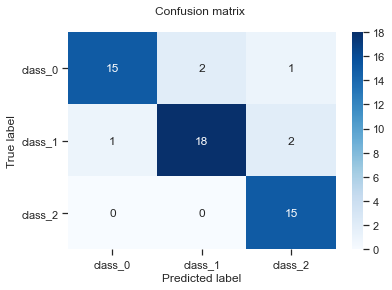

In [48]:
## EJECUTAR ESTE BLOQUE

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Compute confusion matrix. By default is not normalized (normalize=None)
# If necessary change 'y_pred' according to your variable name
cm = confusion_matrix(y_test, y_pred) 

# Only use the labels that appear in the data
classes = wine.target_names[unique_labels(y_test, y_pred)]

df = pd.DataFrame(cm, index = classes, columns = classes)

g = sns.heatmap(df, annot=True, cmap="Blues")
g.set_yticklabels(g.get_yticklabels(), rotation = 0)

plt.title('Confusion matrix \n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.autoscale()

De esta última matriz se observa que de 18 casos de "class_0" el modelo predijo que 15 son de esa clase, 2 de "class_1" y 1 de "class_2". Mientras que de 21 casos de "class_1" el modelo predijo que 1 es de "class_0", 18 de la clase real y 2 de "class_2". Por otro lado, para el caso de "class_2", el modelo predijo que todos esos casos corresponden a esa misma clase.
En general se observa un buen rendimiento del modelo, ya que logró predicir bien en la mayoría de los casos para las distintas clases.

## CLASIFICADOR 3

Para este clasificador utilizaremos Cross-validation. Con cross-validation, el conjunto de entrenamiento se divide en $k$ conjuntos disjuntos; se entrena sobre los datos correspondientes a $k-1$ de éstos, y se evalúa sobre el conjunto restante. Esto se repite $k$ veces, evaluando siempre sobre un conjunto distinto. Teniendo en cuenta el parámetro $k$, a éste método se le llama $k$-fold cross-validation.

El código que está a continuación realizará 10-fold cross-validation usando Decision Tree sobre los datos. La forma de estimar el rendimiento del clasificador es, entre otras cosas, calculando el promedio de todos los k-folds.

Además se muestra la predición sobre los datos para testear. 

In [ ]:
## EJECUTAR ESTE BLOQUE

from sklearn.model_selection import cross_validate
import numpy as np

scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']
cv_results = cross_validate(clf, X, y, cv = 10, scoring = scoring, return_train_score= True)

print('Promedio Precision:', np.mean(cv_results['test_precision_macro']))
print('Promedio Recall:', np.mean(cv_results['test_recall_macro']))
print('Promedio F1-score:', np.mean(cv_results['test_f1_macro']))
print('Promedio Accucary:', np.mean(cv_results['test_accuracy']))

#Si quisieramos mostrar el resultado de cada k-fold, deberiamos quitar la 
#funcion np.mean la cual retorna el promedio. Esto mostraría una lista con el resultado de cada fold

## Pregunta 2.7

- ¿Qué indican los resultados obtenidos? 

- Compare los valores de las métricas con respecto a lo obtenido en la pregunta 2.4 y comente en qué difieren y por qué.

- ¿Qué beneficios tiene emplear cross-validation?

# Parte 3: Comparar clasificadores

Una de las principales tareas en enfoques supervisados es evaluar diferentes clasificadores y encontrar el mejor rendimiento de alguno de ellos. Por ejemplo, si tenemos dos (o más) clasificadores y queremos compararlos entre sí, nos interesa responder: *¿Cuál de los clasificadores es el mejor?* 
Para responder esta pregunta, no existe una única solución. 

Lo que haremos a continuación será ejecutar diferentes clasificadores y compararlos en base a las métricas de Precision, Recall y F1-score.

### PREGUNTA 3.1


Para realizar la evaluación de distintos clasificadores, vamos a crear la función `run_classifier()`, la cual evalúa un clasificador `clf` recibido como parámetro, un dataset `X,y` (features y target) y un número de tests llamado `num_test`. Esta función almacena y retorna los valores de precision, recall y f1-score en la variable `metrics` además de los resultados de predicción.

En base a lo anterior, incluya las sentencias que ajusten el modelo junto a su correspondiente predicción sobre los datos. **No use cross-validation ni tampoco el parámetro `random_state`.**



In [ ]:
### COMPLETAR ESTE CÓDIGO

## run_classifier recibe un clasificador y un dataset (X, y)
## y opcionalmente la cantidad de resultados que se quiere obtener del clasificador

from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
import numpy as np

def run_classifier(clf, X, y, num_tests=100):
    metrics = {'f1-score': [], 'precision': [], 'recall': []}
    
    for _ in range(num_tests):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)
        ### INICIO COMPLETAR ACÁ 
        
        #### TIP: en base a los set de entrenamiento, genere la variable 'predictions' 
        #### que contiene las predicciones del modelo
        
        
        ### FIN COMPLETAR ACÁ
        
        metrics['y_pred'] = predictions
        metrics['f1-score'].append(f1_score(y_test, predictions)) 
        metrics['recall'].append(recall_score(y_test, predictions))
        metrics['precision'].append(precision_score(y_test, predictions))
    
    return metrics

Luego de completar el código anterior, ejecute el siguiente bloque para comparar distintos clasificadores. 
Usaremos un **dataset de cáncer de mamas** para evaluar. La información del dataset se puede encontrar en el siguiente link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [ ]:
## ejecutar este código

from sklearn.datasets import load_breast_cancer
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  # naive bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  # support vector machine classifier

bc = load_breast_cancer()    # dataset cancer de mamas
X = bc.data
y = bc.target

c0 = ("Base Dummy", DummyClassifier(strategy='stratified'))
c1 = ("Decision Tree", DecisionTreeClassifier(max_depth=5))
c2 = ("Gaussian Naive Bayes", GaussianNB())
c3 = ("KNN", KNeighborsClassifier(n_neighbors=10))
c4 = ("Support Vector Machines", SVC())

classifiers = [c0, c1, c2, c3, c4]

results = {}
for name, clf in classifiers:
    metrics = run_classifier(clf, X, y)   # hay que implementarla en el bloque anterior.
    results[name] = metrics
    print("----------------")
    print("Resultados para clasificador: ", name) 
    print("Precision promedio:", np.array(metrics['precision']).mean())
    print("Recall promedio:", np.array(metrics['recall']).mean())
    print("F1-score promedio:", np.array(metrics['f1-score']).mean())
    print("----------------\n\n")  

## Pregunta 3.2


Explique cómo escoge un árbol de decisión el atributo raíz.



## Pregunta 3.3

Explique el problema de optimización que resuelve una SVM lineal.



## Pregunta 3.4

Analizando los resultados obtenidos de cada clasificador, y basándose en las métricas calculadas. ¿Cuál es el mejor clasificador? ¿Qué métricas observó para tomar esa decisión y por qué? considerando el problema que aborda. Fundamente su respuesta.

## Pregunta 3.5

Un consultor en minería de datos tiene la siguiente estrategia al momento de enfrentar un problema de clasificación: probar todos los modelos posibles hasta encontrar uno que tenga cero error de entrenamiento. Comente la estrategia del consultor y proponga una estrategia alternativa.

## Pregunta 3.6

El mismo consultor siempre usa la misma métrica para evaluar un modelo: accuracy. Comente la estrategia del consultor y proponga una estrategia alternativa.

# Parte 4: Seleccionar hiperparámetros

Los hiperparámetros son parámetros que no se aprenden directamente dentro de los estimadores. En scikit-learn se pasan como argumentos al constructor de las clases, por ejemplo cuál kernel usar para Support Vector Classifier, o qué criterio para Decision Tree, etc. Es posible y recomendable buscar en el espacio de hiperparámetros la mejor alternativa.

Tenga en cuenta que es común que un pequeño subconjunto de esos parámetros pueda tener un gran impacto en el rendimiento predictivo o de cálculo del modelo, mientras que otros pueden dejar sus valores predeterminados. Se recomienda leer la documentación de la clase de estimador para obtener una mejor comprensión de su comportamiento esperado.

## GridSearchCV

Una alternativa para seleccionar hiperparámetros es GridSearchCV, la cual considera exhaustivamente todas las combinaciones de parámetros. GridSearchCV recibe un *estimador*, recibe *param_grid* (un diccionario o una lista de diccionarios con los nombres de los parametros a probar como keys y una lista de los valores a probar), *scoring* una o varias funciones de puntuación (score) para evaluar cada combinación de parametros (opciones válidas: https://scikit-learn.org/stable/modules/model_evaluation.html) y *cv* una extrategia para hacer validación cruzada.

El siguiente código muestra cómo seleccionar el número de vecinos y qué pesos otorgar a los vecinos en un clasificador KNN. 
 


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)

#Configure tuned_parameters
tuned_parameters = {'n_neighbors': [1, 3, 5, 10], 
                    'weights': ['uniform','distance']}

#set scoring metric
score = 'precision' 

#Construir el clf con GridSearch
clf = GridSearchCV(KNeighborsClassifier(), 
                   param_grid=tuned_parameters, 
                   cv=5,
                   scoring=score)

#Entrenar clf
clf.fit(X_train, y_train)

print("Mejor combinación de parámetros:")
print(clf.best_params_)
 
y_true, y_pred = y_test, clf.predict(X_test)

print(classification_report(y_true, y_pred))

## Pregunta 4.1

*  a) Realice este mismo proceso para un clasificador DecisionTree y los parametros criterion=['gini','entropy'], max_depth=[2,5,10] y tomando como scoring metric 'f1'. Use cv=6
*  b) ¿Qué puede decir de los resultados, con cuáles parámetros los obtuvo (revise que su respuesta concuerde con lo que imprime)? ¿Cuál considera que es la principal ventaja de aplicar GridSearchCV? ¿Considera que es necesario seguir explorando los parámetros?

In [ ]:
## RESPUESTA A PREGUNTA 4.1 a)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)

## COMPLETE ACÁ

##### FIN COMPLETE ACÁ
print("Mejor combinación de parámetros:")
print(clf.best_params_)
 
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

# Parte 5: Trabajar con clases desbalanceadas

Para mejorar el rendimiento de un clasificador sobre clases desbalanceadas existen varias técnicas. En esta parte, veremos cómo tratar con este problema usando (sub/over) sampling de las clases.

(*Nota: Para ejecutar el siguiente bloque es necesaria la librería `pandas` que viene incluida en Anaconda.*)

In [ ]:
import pandas as pd

# Cargamos dataset desbalanceado
unbalanced_path = 'https://users.dcc.uchile.cl/~hsarmien/mineria/datasets/unbalanced.csv'
data = pd.read_csv(unbalanced_path)  # abrimos el archivo csv y lo cargamos en data
data.head()

Note el desbalance de las clases ejecutando el siguiente código:

In [ ]:
print("Distribucion de clases original")
data['Class'].value_counts()

Distribucion de clases original


0    225
1    126
Name: Class, dtype: int64

Antes de hacer algo para tratar el desbalance entre las clases primero debemos dividir en train-test.

In [ ]:
data_train, data_test, ytrain, ytest = train_test_split(data, data['Class'], test_size=0.3, stratify=data['Class'])

Así queda la proporción de clases en el train después de dividir en train-test.

In [ ]:
ytrain.value_counts()

0    157
1     88
Name: Class, dtype: int64

Ahora, usando el dataset anterior, aplicaremos **oversampling** y **subsampling** al train para que queden balanceados. Ejecute el siguiente código y note ahora que las clases están balanceadas. 

In [ ]:
import numpy as np

print("Distribución de clases usando (over/sub) sampling")
print()

data_train = data_train.reset_index(drop=True)

# oversampling sobre la clase 1
idx = np.random.choice(data_train[data_train['Class'] == 1].index, size=69)
data_oversampled = pd.concat([data_train, data_train.iloc[idx]])
print("Data oversampled on class '1'")
print(data_oversampled['Class'].value_counts())
print()


# subsampling sobre la clase 0
idx = np.random.choice(data_train.loc[data_train.Class == 0].index, size=69, replace=False)
data_subsampled = data_train.drop(data_train.iloc[idx].index)
print("Data subsampled on class '0'")
print(data_subsampled['Class'].value_counts())

Distribución de clases usando (over/sub) sampling

Data oversampled on class '1'
1    157
0    157
Name: Class, dtype: int64

Data subsampled on class '0'
1    88
0    88
Name: Class, dtype: int64


## Pregunta 5. 1

¿Por qué aplicar (sub/over) sampling de las clases sobre el conjunto de entrenamiento en lugar de aplicarlo sobre el dataset completo?

**Nota:** *Librerías como `imblearn` son muy útiles para balancear los datos.*

Vamos a entrenar un árbol de decisión (`DecisionTreeClassifier`) sobre los 3 datasets por separado (**original**, con **oversampling** y con **subsampling**) y luego comparamos los resultados usando alguna métrica de evaluación.

Ejecute el siguiente bloque para cargar los datos:

In [ ]:
## ejecutar este código para preparar los datos
from sklearn.metrics import classification_report

# Preparando los data frames para ser compatibles con sklearn

# datos test (mismo para todos los conjuntos de entrenamiento)
X_test = data_test[data_train.columns[:-1]] # todo hasta la penultima columna
y_test = data_test[data_train.columns[-1]]  # la última columna

# datos entrenamiento "originales"
X_orig = data_train[data_train.columns[:-1]] 
y_orig = data_train[data_train.columns[-1]] 

# datos entrenamiento "oversampleados" 
X_over = data_oversampled[data_train.columns[:-1]]
y_over = data_oversampled[data_train.columns[-1]]

# datos entrenamiento "subsampleados"
X_subs = data_subsampled[data_train.columns[:-1]]
y_subs = data_subsampled[data_train.columns[-1]]

A continuación, se ejecuta el clasificador en cada uno de los tres casos, usando como datos de entrada lo del bloque anterior. Para cada caso se entrena con el dataset correspondiente y se evalúa con el conjunto de test (el mismo para los tres casos) obtenido con train_test_split sobre los datos originales. 

Se muestra Precision, Recall y F1-score.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## Pasos:
##  - instanciar el clasificador con DecisionTreeClassifier()
##  - entrenar con fit()
##  - hacer las predicciones
##  - mostrar precision, recall y f1-score con classification report.

print("ORIGINAL::::::::::")
clf_orig = DecisionTreeClassifier()
clf_orig.fit(X_orig, y_orig)
pred_orig = clf_orig.predict(X_test)
print(classification_report(y_test, pred_orig))

print("OVERSAMPLING::::::::::")
clf_over = DecisionTreeClassifier()
clf_over.fit(X_over, y_over)
pred_over = clf_over.predict(X_test)
print(classification_report(y_test, pred_over))

print("SUBSAMPLING::::::::::")
clf_subs = DecisionTreeClassifier()
clf_subs.fit(X_subs, y_subs)
pred_subs = clf_subs.predict(X_test)
print(classification_report(y_test, pred_subs))

ORIGINAL::::::::::
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        68
           1       0.91      0.84      0.88        38

    accuracy                           0.92       106
   macro avg       0.91      0.90      0.91       106
weighted avg       0.92      0.92      0.91       106

OVERSAMPLING::::::::::
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        68
           1       0.92      0.87      0.89        38

    accuracy                           0.92       106
   macro avg       0.92      0.91      0.92       106
weighted avg       0.92      0.92      0.92       106

SUBSAMPLING::::::::::
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.91      0.82      0.86        38

    accuracy                           0.91       106
   macro avg       0.91      0.89      0.89       106
weighted a

## Pregunta 5.2

- Observe los resultados obtenidos por clase con cada conjunto de entrenamiento, se puede observar alguna diferencia importante? 
- Indique una desventaja de usar oversampling y una desventaja de usar subsampling en clasificación.